# Combine all 3 datasets at beginning stage

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.font_manager as fm

%matplotlib inline

In [3]:
# load disgenet data

file = 'all_gene_disease_associations.txt.gz'

# Roll through gzip csv file using pandas reader
reader = pd.read_csv(file, sep='\t', compression='gzip', iterator=True, chunksize=10000)

# Concatenate to build dataframe
df = pd.concat(reader, ignore_index=True)
print(df.shape)

(429111, 9)


In [4]:
df.head(2)

,geneId,geneSymbol,geneName,diseaseId,diseaseName,score,NumberOfPubmeds,associationType,source
0,540,ATP7B,"ATPase, Cu++ transporting, beta polypeptide",umls:C0019202,Hepatolenticular Degeneration,0.972607,200,"AlteredExpression, Biomarker, GeneticVariation","BeFree, CLINVAR, CTD_human, GAD, LHGDN, MGD, R..."
1,4160,MC4R,melanocortin 4 receptor,umls:C0028754,Obesity,0.940000,264,"Biomarker, GeneticVariation","BeFree, CLINVAR, CTD_human, GAD, MGD, RGD, UNI..."


In [5]:
# select 3 categories and make diseaseName lowercase

dfdgn = df[['geneSymbol','diseaseName','associationType','score']].copy()
dfdgn['diseaseName'] = dfdgn['diseaseName'].str.lower()
dfdgn.head(2)

,geneSymbol,diseaseName,associationType,score
0,ATP7B,hepatolenticular degeneration,"AlteredExpression, Biomarker, GeneticVariation",0.972607
1,MC4R,obesity,"Biomarker, GeneticVariation",0.940000


In [6]:
# Load other datasets
dfhpo = pd.read_csv('hpo.csv', sep='\t')
dfhpo['diseaseName'] = dfhpo['diseaseName'].str.lower()
print(dfhpo.shape)
dfmined = pd.read_csv('mined.csv', sep='\t')
dfmined['diseaseName'] = dfmined['diseaseName'].str.lower()
print(dfmined.shape)

(96796, 3)
(710973, 3)


In [7]:
dfhpo['geneSymbol'] = dfhpo['gene']
dfhpo.drop('gene',axis=1,inplace=True)
dfhpo.head()

,diseaseName,score_hpo,geneSymbol
0,acholic stools,1,CYP7B1
1,hepatic failure,1,CYP7B1
2,steatorrhea,1,CYP7B1
3,pruritus,1,CYP7B1
4,hepatomegaly,1,CYP7B1


In [8]:
dfmined['geneSymbol'] = dfmined['gene']
dfmined.drop('gene',axis=1,inplace=True)
dfmined.head(2)

,diseaseName,score_conf,geneSymbol
0,human immunodeficiency virus infectious disease,1.5,7SK
1,acquired immunodeficiency syndrome,1.4,7SK


In [9]:
dfdgnhpo = pd.merge(dfdgn,dfhpo,how='left',on=['geneSymbol','diseaseName'], 
                      suffixes=['_dgn','_hpo'])
# dfdgnhpo = pd.merge(dfdgn,dfhpo,how='left',on=['geneSymbol'], 
#                       suffixes=['_dgn','_hpo'])
print(dfdgnhpo.shape)
dfdgnhpo.head()

(429844, 5)


,geneSymbol,diseaseName,associationType,score,score_hpo
0,ATP7B,hepatolenticular degeneration,"AlteredExpression, Biomarker, GeneticVariation",0.972607,NaN
1,MC4R,obesity,"Biomarker, GeneticVariation",0.940000,1
2,IRS1,"diabetes mellitus, type 2","Biomarker, GeneticVariation",0.907216,NaN
3,MECP2,rett syndrome,"AlteredExpression, Biomarker, GeneticVariation...",0.900000,NaN
4,CFTR,cystic fibrosis,"AlteredExpression, Biomarker, GeneticVariation",0.900000,NaN


In [10]:
dfthree = pd.merge(dfdgnhpo,dfmined,how='left',on=['geneSymbol','diseaseName'], 
                      suffixes=['_dgn','_mined'])
print(dfthree.shape)
dfthree.head(20)

(429844, 6)


,geneSymbol,diseaseName,associationType,score,score_hpo,score_conf
0,ATP7B,hepatolenticular degeneration,"AlteredExpression, Biomarker, GeneticVariation",0.972607,NaN,NaN
1,MC4R,obesity,"Biomarker, GeneticVariation",0.940000,1,3.4
2,IRS1,"diabetes mellitus, type 2","Biomarker, GeneticVariation",0.907216,NaN,NaN
3,MECP2,rett syndrome,"AlteredExpression, Biomarker, GeneticVariation...",0.900000,NaN,4.0
4,CFTR,cystic fibrosis,"AlteredExpression, Biomarker, GeneticVariation",0.900000,NaN,4.0
5,PRNP,creutzfeldt-jakob syndrome,"AlteredExpression, Biomarker, GeneticVariation",0.884361,NaN,NaN
6,FMR1,fragile x syndrome,"AlteredExpression, Biomarker, GeneticVariation",0.880361,NaN,4.0
7,KIT,gastrointestinal stromal tumors,"AlteredExpression, Biomarker, GeneticVariation",0.879390,NaN,NaN
8,MEFV,familial mediterranean fever,"AlteredExpression, Biomarker, GeneticVariation",0.870271,NaN,4.0
9,SCN5A,brugada syndrome,"Biomarker, GeneticVariation",0.869105,NaN,4.0


In [11]:
# Calculate weighted sum of score

wgtdgn = 0.7
wgthpo = (1-wgtdgn)*0.5
wtgconf = (1-wgtdgn)*0.5*0.25  # current scale is 0 to 4, rescale to 0 to 1

for col in ['score','score_hpo','score_conf']:
    dfthree[col].fillna(value=0, inplace=True)
dfthree['score_total'] = dfthree['score']*wgtdgn + \
                            dfthree['score_hpo']*wgthpo + \
                                dfthree['score_conf']*wtgconf

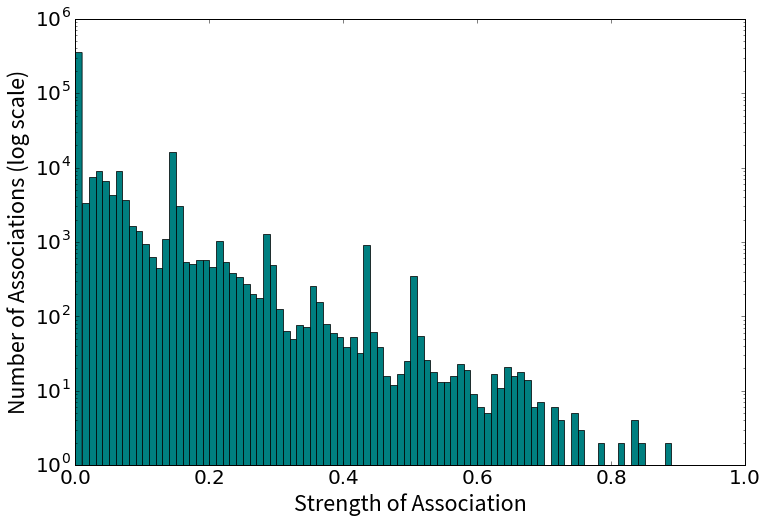

In [12]:
# Visualize distribution of scores among the gene-disease associations listed

bins = np.arange(0,1.01,0.01)
color = '#007f80'


plt.rc('font', size='20')
prop = fm.FontProperties(fname='/Library/fonts/SourceSansPro-Regular.ttf')

fig, ax = plt.subplots(1, figsize=(12,8))
ax.set_xlabel('Strength of Association', fontproperties=prop)
ax.set_ylabel('Number of Associations (log scale)', fontproperties=prop)
ax.xaxis.label.set_fontsize(24)
ax.yaxis.label.set_fontsize(24)
ax.set_yscale("log", nonposy='clip')
_,_,_ = plt.hist(dfthree['score_total'], bins=bins, color=color, lw=0.75)

# plt.savefig('../genediseaselink-web/static/fullhist.png',bbox_inches='tight',dpi=150)
plt.show()

# dfthree['score_total'].hist(bins=30, color='#007f80', lw=0.75)

In [13]:
# Mean and median score of all disease

print('Mean score:', '{:.5f}'.format(dfthree['score_total'].mean()))
print('Median score:', '{:.5f}'.format(dfthree['score_total'].median()))

sermid = dfthree['score_total']>0.5   # return boolean series so sum to get count of True values
print('Percentage of data above score range midpoint (0.5):', 
      '{:.2%}'.format(sermid.sum()/df['score'].count()))

Mean score: 0.02012
Median score: 0.00040
Percentage of data above score range midpoint (0.5): 0.16%


In [14]:
# Number of genes per disease

dfdis = dfthree[['diseaseName','geneSymbol']].groupby(['diseaseName'], sort=False).count()
dfdis.columns = ['geneCount']
dfdis.sort_values('geneCount', ascending=False, inplace=True)

print('Number of total diseases in database:', dfdis.shape[0])

# Move diseaseName to column and reset index to integers
dfdis.reset_index(level=0, inplace=True)
dfdis.head()

Number of total diseases in database: 14553


,diseaseName,geneCount
0,"neoplasm, malignant",5689
1,primary malignant neoplasm,5095
2,malignant neoplasm breast,4219
3,breast carcinoma,3988
4,carcinogenesis,3398


In [15]:
# Calculate the number of diseases per gene

dfgene = dfthree[['geneSymbol','diseaseName']].groupby(['geneSymbol'], sort=False).count()
dfgene.columns = ['diseaseCount']
dfgene.sort_values('diseaseCount', ascending=False, inplace=True)

print('Number of total genes in database:', dfgene.shape[0])

# Move diseaseName to column and reset index to integers
dfgene.reset_index(level=0, inplace=True)
dfgene.head()

Number of total genes in database: 17175


,geneSymbol,diseaseCount
0,TNF,1534
1,TP53,1471
2,IL6,1243
3,VEGFA,1020
4,IL10,964


In [16]:
# Mean and median score of all disease

# print('Mean score:', '{:}'.format(dfgene['diseaseCount'].mean()))
# print('Median score:', '{:}'.format(dfgene['diseaseCount'].median()))

# sermgene = dfgene['disease']>0.5   # return boolean series so sum to get count of True values
# print('Percentage of data above score range midpoint (0.5):', 
#       '{:.2%}'.format(sermgene.sum()/df['score'].count()))

dfgene['diseaseCount'].describe()

count    17175.000000
mean        25.027307
std         57.361351
min          1.000000
25%          2.000000
50%          7.000000
75%         24.000000
max       1534.000000
Name: diseaseCount, dtype: float64

In [17]:
# Merge three previous dataframes preserving all duplicate disease names

dfscoredis = pd.merge(dfgene,dfthree,how='outer')

# print(dfscoredis.shape)
# dfscoredis.head()
dfcounts = pd.merge(dfdis,dfscoredis,how='outer')
dfcounts.sort_values('score_total',ascending=False, inplace=True)
dfcounts.columns = ['diseaseName','geneCount','geneSymbol','diseaseCount','associationType',
                    'score_gdn','score_hpo','score_conf','score_total']
print(dfcounts.shape)
dfcounts.head(10)

(429844, 9)


,diseaseName,geneCount,geneSymbol,diseaseCount,associationType,score_gdn,score_hpo,score_conf,score_total
81158,obesity,1716,MC4R,79,"Biomarker, GeneticVariation",0.940000,1,3.4,0.935500
360150,malignant hyperthermia,37,RYR1,75,"Biomarker, GeneticVariation",0.831580,1,4.0,0.882106
360151,malignant hyperthermia,37,RYR1,75,"Biomarker, GeneticVariation",0.831580,1,4.0,0.882106
306845,frontotemporal dementia,99,MAPT,154,"Biomarker, GeneticVariation",0.800854,1,3.7,0.849348
306844,frontotemporal dementia,99,MAPT,154,"Biomarker, GeneticVariation",0.800854,1,3.7,0.849348
386518,cystinuria,17,SLC3A1,18,"Biomarker, GeneticVariation",0.767593,1,4.0,0.837315
386517,cystinuria,17,SLC7A9,20,"Biomarker, GeneticVariation",0.767535,1,4.0,0.837274
377491,aniridia,23,PAX6,155,"Biomarker, GeneticVariation",0.764736,1,4.0,0.835315
377490,aniridia,23,PAX6,155,"Biomarker, GeneticVariation",0.764736,1,4.0,0.835315
381229,choroideremia,21,CHM,32,"Biomarker, GeneticVariation",0.745938,1,3.9,0.818406


In [18]:
# Save all GDAs that match threshold

dfcounts['count_total'] = (dfcounts['geneCount'] + 0.08*dfcounts['diseaseCount'])**-1
dfcounts[dfcounts['diseaseCount']<20].to_csv('FullGDA3databases.tsv',sep='\t',index=False)

In [19]:
# Check for duplicates where disease and gene match and keep one with highest score

dfcounts['duplicate'] = dfcounts['diseaseName']+dfcounts['geneSymbol']
dfcounts.sort_values('score_total',inplace=True,ascending=False)
dfthreedrop = dfcounts.drop_duplicates(subset=['duplicate'],keep='first')

dfthreedrop.drop('duplicate',axis=1,inplace=True)
print(dfthreedrop.shape)

(427689, 10)


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
# save progress, non-duplicated GDAs

# dfcounts.to_csv('FullGDA3databasesNoDup.tsv',sep='\t',index=False)

In [21]:
dfthreedrop.sort_values('score_total',ascending=False)
dfthreedrop.head()

,diseaseName,geneCount,geneSymbol,diseaseCount,associationType,score_gdn,score_hpo,score_conf,score_total,count_total
81158,obesity,1716,MC4R,79,"Biomarker, GeneticVariation",0.940000,1,3.4,0.935500,0.000581
360151,malignant hyperthermia,37,RYR1,75,"Biomarker, GeneticVariation",0.831580,1,4.0,0.882106,0.023256
306845,frontotemporal dementia,99,MAPT,154,"Biomarker, GeneticVariation",0.800854,1,3.7,0.849348,0.008983
386518,cystinuria,17,SLC3A1,18,"Biomarker, GeneticVariation",0.767593,1,4.0,0.837315,0.054230
386517,cystinuria,17,SLC7A9,20,"Biomarker, GeneticVariation",0.767535,1,4.0,0.837274,0.053763


# Set threshold

In [22]:
# assign the threshold for high-quality data

dfthresh = dfthreedrop[(dfthreedrop['geneCount']<20) & 
#                        (dfthreedrop['score_total']>np.percentile(dfthreedrop['score_total'],99.8)) & 
                       (dfthreedrop['score_total']>0.505) & 
                       (dfthreedrop['diseaseCount']<20)].copy()
dfthresh.reset_index(inplace=True,drop=True)

# drop duplicate diseases
dfthresh['score_total'] = (dfthresh['score_total']-0.5)*2
dfthresh=dfthresh.sort_values('score_total',ascending=False)
dfthresh.drop_duplicates('diseaseName',inplace=True)
print(dfthresh.shape)
# dfthresh.tail()

(56, 10)


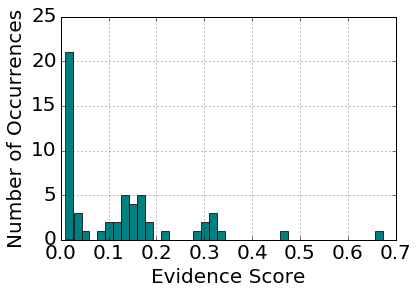

In [23]:
# Visualize distribution of scores among the gene-disease associations listed

# bins = np.arange(0,1.01,0.01)
# color = '#007f80'


# plt.rc('font', size='18')
# prop = fm.FontProperties(fname='/Library/fonts/SourceSansPro-Regular.ttf')

# fig, ax = plt.subplots(1, figsize=(12,8))
# ax.set_xlabel('Weighted score from all 3 datasets', fontproperties=prop)
# ax.set_ylabel('Number of associations (log scale)', fontproperties=prop)
# ax.xaxis.label.set_fontsize(20)
# ax.yaxis.label.set_fontsize(20)
# ax.set_yscale("log", nonposy='clip')
# _,_,_ = plt.hist(dfthresh['score_total'], bins=bins, color=color, lw=0.75)

# plt.show()

dfthresh['score_total'].hist(bins=40, color='#007f80', lw=0.75)
plt.xlabel('Evidence Score')
plt.ylabel('Number of Occurrences')

In [24]:
dfthresh.to_csv('GDAs0o50g20d20.tsv',sep='\t',index=False)

___
# Identify categories

In [25]:
# Get category info from previous dataframe

dfreload = pd.read_csv('GDAs0o50g20d20.tsv',sep='\t')
dfalias = pd.read_csv('ConditionAliasAddtl.csv', sep=',')
dfreload.head()

,diseaseName,geneCount,geneSymbol,diseaseCount,associationType,score_gdn,score_hpo,score_conf,score_total,count_total
0,cystinuria,17,SLC3A1,18,"Biomarker, GeneticVariation",0.767593,1,4,0.674630,0.054230
1,mucopolysaccharidosis vi,6,ARSB,16,"Biomarker, GeneticVariation",0.837236,0,4,0.472130,0.137363
2,alkaptonuria,1,HGD,16,"Biomarker, GeneticVariation",0.733834,0,4,0.327367,0.438596
3,cherubism,10,SH3BP2,9,"Biomarker, GeneticVariation",0.729894,0,4,0.321851,0.093284
4,ellis-van creveld syndrome,5,EVC,12,"Biomarker, GeneticVariation",0.723940,0,4,0.313516,0.167785


In [26]:
# Fill in NaN values in Alias column then sum together

dfnewalias = dfalias.fillna('NA')
# dfnewalias['aliases']=dfnewalias['Condition']+dfnewalias['Alias']+dfnewalias['OtherAliases']
dfnewalias['aliases']=dfnewalias['Condition']+dfnewalias['Alias']
# dfnewalias.drop(['Condition','Alias','OtherAliases','Relative Link'],axis=1,inplace=True)
# dfnewalias.drop(['Condition','Alias','OtherAliases','Relative Link'],axis=1,inplace=True)
dfuniq = dfnewalias.drop_duplicates('Condition')
print(dfnewalias.shape,dfuniq.shape)

(10145, 6) (5143, 6)


In [27]:
# dfnewalias[(dfnewalias.aliases.str.contains('canavan')) & 
#            (dfnewalias.aliases.str.contains('disease'))]
# dfnewalias.aliases.iloc[[8,16,24]]
# dfuniq.head()

## Create dictionary of categories and keywords

In [28]:
# Dictionary of categories and keywords

catkeys = ['blood','bone','brain','cancer','digest','ent','endocrine','eye',
           'metabolism','heart','immune','kidney','lung','mental','mouth','reproductive','skin']
catvals = sorted(dfnewalias['Category'].unique())
catdict = dict(zip(catkeys,catvals))
catdict['all'] = 'All'
print(catdict)

{'all': 'All', 'endocrine': 'Endocrine system (hormones)', 'reproductive': 'Reproductive system', 'mouth': 'Mouth and teeth', 'kidney': 'Kidneys and urinary system', 'lung': 'Lungs and breathing', 'heart': 'Heart and circulation', 'digest': 'Digestive system', 'blood': 'Blood/lymphatic system', 'ent': 'Ear, nose, and throat', 'brain': 'Brain and nervous system', 'metabolism': 'Food, nutrition, and metabolism', 'immune': 'Immune system', 'mental': 'Mental health and behavior', 'cancer': 'Cancers', 'bone': 'Bones, muscles, and connective tissues', 'eye': 'Eyes and vision', 'skin': 'Skin, hair, and nails'}


## Find first two disease name words among alias

In [29]:
# Use regex to select first two names in GeneDiseaseUnique.csv and match those to ConditionAliasAddtl.csv
import re
p = re.compile('^(\w+).+?(\w+)')
# psub = re.compile(',|[0-9]|type')
# psub = re.compile('-|\(|\)')

# Parse disease names
# terms = []
# for idx in dfthresh.index:
#     term = list(p.findall(dfthresh['diseaseName'].iloc[idx]))
#     term = [s for s in term if len(s)>3]
#     term = [s.replace(',','') for s in term]
#     term = list(filter(None,[psub.sub('',s) for s in term]))
#     terms.append(term)

dfreload['parse'] = dfreload['diseaseName'].str.extract('^(\w+.+?\w+)')
dfreload['parse'] = dfreload['parse'].str.replace('-|\(|\)|,',' ')
dfreload.head()

# print(len(terms),'out of',len(dfthresh),'links not found.')

,diseaseName,geneCount,geneSymbol,diseaseCount,associationType,score_gdn,score_hpo,score_conf,score_total,count_total,parse
0,cystinuria,17,SLC3A1,18,"Biomarker, GeneticVariation",0.767593,1,4,0.674630,0.054230,cystinuria
1,mucopolysaccharidosis vi,6,ARSB,16,"Biomarker, GeneticVariation",0.837236,0,4,0.472130,0.137363,mucopolysaccharidosis vi
2,alkaptonuria,1,HGD,16,"Biomarker, GeneticVariation",0.733834,0,4,0.327367,0.438596,alkaptonuria
3,cherubism,10,SH3BP2,9,"Biomarker, GeneticVariation",0.729894,0,4,0.321851,0.093284,cherubism
4,ellis-van creveld syndrome,5,EVC,12,"Biomarker, GeneticVariation",0.723940,0,4,0.313516,0.167785,ellis van


In [30]:
# Search for each term in dfnewaliases.aliases and save link and category

# Set link and category for corresponding disease in dfgda

dfgda=dfreload.copy()
# print(dfgda.shape)
# print(dfgda.columns)
# dfgda['category']=pd.Series(np.nan)
dfgda['category']=pd.Series(np.nan).astype(str)
# print(dfgda.shape)
col = 'Condition'
# col = 'aliases'



### How to check if both of two strings are present in dataframe column and return other value from corresponding column?
for idx in dfgda[dfgda.category.isnull()].index:
# for idx in dfgda.index:
    # Check if term is a one word (string) or two words (list)
    term = dfgda['parse'].ix[idx].split()
#     print(term)
    if len(term)>1:
        matched = dfuniq['Category'][(dfuniq[col].str.contains(term[0])) & 
                                         (dfuniq[col].str.contains(term[1]))]
#         print(matched.values.shape[0]==0)
        if len(matched.unique())>0:
#             hi = len(matched)
#             newcat = matched['Category'].iloc[np.random.randint(0,hi)]
            val = '_'.join(matched.unique())
            dfgda.set_value(idx,'category',val)
    else:
        matched = dfuniq['Category'][dfuniq[col].str.contains(term[0])]
#         print(','.join(matched.unique()))
        if len(matched.unique())>0:
#             hi = len(matched)
#             newcat = matched['Category'].iloc[np.random.randint(0,hi)]
            val = '_'.join(matched.unique())
            dfgda.set_value(idx,'category',val)

In [31]:
# Categories not found

print(dfgda[dfgda.category.isnull()].shape)
# dfnotnull = dfgda[dfgda.category.notnull()]
# print(dfnotnull.shape)
# print(dfnotnull['diseaseName'][dfnotnull.category.str.contains('_')].tolist())
# print(dfnotnull['category'][dfnotnull.category.str.contains('_')].str.split('_').tolist())
dfgda[dfgda.category.isnull()]

(13, 12)


,diseaseName,geneCount,geneSymbol,diseaseCount,associationType,score_gdn,score_hpo,score_conf,score_total,count_total,parse,category
7,acrodermatitis enteropathica,8,SLC39A4,18,"Biomarker, GeneticVariation",0.724253,0,3.9,0.306454,0.105932,acrodermatitis enteropathica,NaN
8,polycystic liver disease,13,SEC63,10,"Biomarker, GeneticVariation",0.513119,1,3.6,0.288366,0.072464,polycystic liver,NaN
9,acrocallosal syndrome,5,KIF7,17,"Biomarker, GeneticVariation",0.721134,0,2.7,0.212088,0.157233,acrocallosal syndrome,NaN
15,occult macular dystrophy,2,RP1L1,6,"Biomarker, GeneticVariation",0.622552,0,3.9,0.164072,0.403226,occult macular,NaN
23,enlarged vestibular aqueduct,8,FOXI1,5,"Biomarker, GeneticVariation",0.411418,1,3.5,0.138485,0.119048,enlarged vestibular,NaN
26,reticular dysgenesis,4,AK2,4,"Biomarker, GeneticVariation",0.621134,0,3.4,0.124588,0.231481,reticular dysgenesis,NaN
27,mulibrey nanism,5,TRIM37,16,"Biomarker, GeneticVariation",0.633492,0,3.1,0.119389,0.159236,mulibrey nanism,NaN
28,megalocornea,4,CHRDL1,7,"Biomarker, GeneticVariation",0.410284,1,3.0,0.099397,0.219298,megalocornea,NaN
33,"leukodystrophy, globoid cell",9,GALC,14,"Biomarker, GeneticVariation",0.742700,0,0.0,0.039781,0.098814,leukodystrophy globoid,NaN
34,"porphyria, erythropoietic",6,UROS,8,"Biomarker, GeneticVariation",0.734713,0,0.0,0.028599,0.150602,porphyria erythropoietic,NaN


## Reset multiple categories found to NaN

In [32]:
# Rows that need fixing, have not-found category or multiple categories
# Reset category to null

dfisnull = dfgda[dfgda.category.isnull()].copy()

dfnotnull = dfgda[dfgda.category.notnull()].copy()  # can't use str on NaN
dfmultic = dfnotnull[dfnotnull.category.str.contains('_')].copy()
dfmultic['category']=np.nan

dffix = pd.concat([dfisnull,dfmultic])
print(dffix.shape,dfisnull.shape,dfmultic.shape)
# dffix

(22, 12) (13, 12) (9, 12)


## Manual setting of some categories

In [33]:
# manual set categories

# idxs = ['cardi','neur','deaf','retin','musc','cataract','ventri','brain',
#         'osteo','diabetes','tooth','albin','arterial','bestrophinopathy','immun', 
#        'sterol', 'glyco', 'dactyl','thyro','renal']
# newcats = ['heart','brain','ent','eye','bone','eye','heart','brain','bone',
#            'metabolism','mouth','skin','heart','eye','immune', 
#           'metabolism', 'metabolism', 'bone', 'endocrine','kidney']

idxs = ['neur','macular','vitamin','derma','epilep','mental','glyco','factor','alveo','anemia','transferase', 
        'dactyl','aqueduct','plasia','citrul','leuko','porph','bestrophin','retic','mammary','pelger']
cats = ['brain','eye','metabolism','skin','brain','mental','metabolism','blood','lung','blood','metabolism', 
           'bone','ent','bone','kidney','blood','blood','eye','bone','reproductive','blood']

idxs.extend(['deaf','sterol','cornea','retin','renal','osteo','hearing','cardio','cataract','deficien','liver','gluta',
       'hypotrichosis','cleft','ichthyo','cystin','alopecia'])
cats.extend(['ent','metabolism','eye','eye','kidney','bone','ent','heart','eye','metabolism','metabolism','metabolism',
       'blood','mouth','skin','kidney','skin'])

for idx,cat in zip(idxs,cats):
    mask = dfgda['diseaseName'].str.contains(idx)
    dffix['category'][mask] = catdict[cat]
dffix[dffix.category.isnull()]

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,diseaseName,geneCount,geneSymbol,diseaseCount,associationType,score_gdn,score_hpo,score_conf,score_total,count_total,parse,category
9,acrocallosal syndrome,5,KIF7,17,"Biomarker, GeneticVariation",0.721134,0,2.7,0.212088,0.157233,acrocallosal syndrome,NaN
27,mulibrey nanism,5,TRIM37,16,"Biomarker, GeneticVariation",0.633492,0,3.1,0.119389,0.159236,mulibrey nanism,NaN
50,johanson blizzard syndrome,1,UBR1,10,"Biomarker, GeneticVariation",0.722268,0,0.0,0.011175,0.555556,johanson blizzard,NaN
21,roberts syndrome,7,ESCO2,15,"Biomarker, GeneticVariation",0.623402,0,3.6,0.142763,0.121951,roberts syndrome,NaN
41,fraser syndrome,7,FREM2,8,"Biomarker, GeneticVariation",0.723402,0,0.0,0.012763,0.130890,fraser syndrome,NaN


## Transfer categories in dffix to dfgda

In [34]:
for row in dffix.index:
    dfgda.set_value(row,'category',dffix.category.loc[row])
dfgda[dfgda.category.isnull()]

,diseaseName,geneCount,geneSymbol,diseaseCount,associationType,score_gdn,score_hpo,score_conf,score_total,count_total,parse,category
9,acrocallosal syndrome,5,KIF7,17,"Biomarker, GeneticVariation",0.721134,0,2.7,0.212088,0.157233,acrocallosal syndrome,NaN
21,roberts syndrome,7,ESCO2,15,"Biomarker, GeneticVariation",0.623402,0,3.6,0.142763,0.121951,roberts syndrome,NaN
27,mulibrey nanism,5,TRIM37,16,"Biomarker, GeneticVariation",0.633492,0,3.1,0.119389,0.159236,mulibrey nanism,NaN
41,fraser syndrome,7,FREM2,8,"Biomarker, GeneticVariation",0.723402,0,0.0,0.012763,0.130890,fraser syndrome,NaN
50,johanson blizzard syndrome,1,UBR1,10,"Biomarker, GeneticVariation",0.722268,0,0.0,0.011175,0.555556,johanson blizzard,NaN


In [35]:
# Add in new count_total column for y-axis of plot

# dfgda['count_total'] = dfgda['geneCount'] - 0.5 + 0.04*dfgda['diseaseCount']
# dfgda.head()

In [36]:
# dfgda[dfgda.category=='']
# dfgda.index
# dfgda[dfgda['parse'].str.contains('renal')]
# dfgda.category.unique()

In [37]:
dfgda.set_value(0,'category',catdict['kidney'])
dfgda.head(2)

,diseaseName,geneCount,geneSymbol,diseaseCount,associationType,score_gdn,score_hpo,score_conf,score_total,count_total,parse,category
0,cystinuria,17,SLC3A1,18,"Biomarker, GeneticVariation",0.767593,1,4,0.67463,0.054230,cystinuria,Kidneys and urinary system
1,mucopolysaccharidosis vi,6,ARSB,16,"Biomarker, GeneticVariation",0.837236,0,4,0.47213,0.137363,mucopolysaccharidosis vi,"Bones, muscles, and connective tissues"


In [38]:
# dfall = pd.read_csv('GDAallthree.tsv',sep='\t')
# dfall.fillna(value='Not Available', inplace=True)

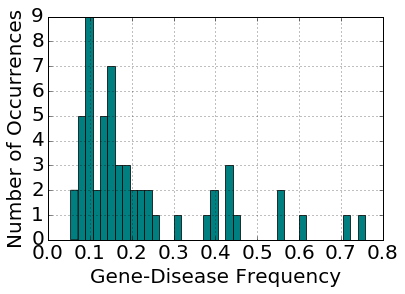

In [39]:
dfgda['count_total'].hist(bins=40, color='#007f80', lw=0.75)
plt.xlabel('Gene-Disease Frequency')
plt.ylabel('Number of Occurrences')

## Parse association type

In [40]:
# split apart associationType on commas
dfgda['associationType'] = dfgda['associationType'].str.replace('Biomarker, ','')
dfgda['associationType'] = dfgda['associationType'].str.replace(', GeneticVariation','')
# dfgda['associationType'][dfga['associationType'].str.contains('Biomarker')]
dfgda['associationType'].unique()

array(['GeneticVariation', 'AlteredExpression'], dtype=object)

In [41]:
dfgda[dfgda['associationType']=='Biomarker']

,diseaseName,geneCount,geneSymbol,diseaseCount,associationType,score_gdn,score_hpo,score_conf,score_total,count_total,parse,category


In [42]:
# calculate distance from ideal position
dfgda['ideal']=np.sqrt(np.square(1-dfgda['score_total'])+np.square(1-dfgda['count_total']))
dftest = dfgda.sort_values('ideal')
dftest.head(10)

,diseaseName,geneCount,geneSymbol,diseaseCount,associationType,score_gdn,score_hpo,score_conf,score_total,count_total,parse,category,ideal
5,alpha-mannosidosis,1,MAN2B1,4,GeneticVariation,0.723686,0,4.0,0.313160,0.757576,alpha mannosidosis,"Food, nutrition, and metabolism",0.728367
2,alkaptonuria,1,HGD,16,GeneticVariation,0.733834,0,4.0,0.327367,0.438596,alkaptonuria,"Bones, muscles, and connective tissues",0.876133
12,l-2-hydroxyglutaric aciduria,1,L2HGDH,8,GeneticVariation,0.411701,1,4.0,0.176381,0.609756,l 2,"Food, nutrition, and metabolism",0.911393
24,fucosidosis,1,FUCA1,5,GeneticVariation,0.621418,0,3.5,0.132485,0.714286,fucosidosis,Brain and nervous system,0.913354
10,peroxisomal acyl-coa oxidase deficiency,1,ACOX1,10,GeneticVariation,0.720567,0,2.4,0.188794,0.555556,peroxisomal acyl,Brain and nervous system,0.924979
6,guanidinoacetate methyltransferase deficiency,2,GAMT,8,GeneticVariation,0.720567,0,4.0,0.308794,0.378788,guanidinoacetate methyltransferase,Brain and nervous system,0.929339
0,cystinuria,17,SLC3A1,18,GeneticVariation,0.767593,1,4.0,0.674630,0.054230,cystinuria,Kidneys and urinary system,1.000173
13,globozoospermia,2,SPATA16,4,GeneticVariation,0.620000,1,0.0,0.168000,0.431034,globozoospermia,Reproductive system,1.007941
1,mucopolysaccharidosis vi,6,ARSB,16,GeneticVariation,0.837236,0,4.0,0.472130,0.137363,mucopolysaccharidosis vi,"Bones, muscles, and connective tissues",1.011331
15,occult macular dystrophy,2,RP1L1,6,GeneticVariation,0.622552,0,3.9,0.164072,0.403226,occult macular,Eyes and vision,1.027090


In [43]:
# save high quality data

dfgda.to_csv('GDAallthreehigh.tsv',sep='\t',index=False)
dfgda.to_csv('../genediseaselink-web/GDAallthreehigh.tsv',sep='\t',index=False)

In [44]:
dfgda[dfgda.diseaseName.str.contains('polycystic')]

,diseaseName,geneCount,geneSymbol,diseaseCount,associationType,score_gdn,score_hpo,score_conf,score_total,count_total,parse,category,ideal
8,polycystic liver disease,13,SEC63,10,GeneticVariation,0.513119,1,3.6,0.288366,0.072464,polycystic liver,"Food, nutrition, and metabolism",1.169079
